In [153]:
import requests
import time
import matplotlib.pyplot as plt
from datetime import datetime
url=f"https://finance.naver.com/item/sise_time.naver?code=035720&thistime=20231103144200&page=1"
my_headers = {'user-agent': 'Mozilla/5.0'}

#요청 헤더 설정하여 HTTP 응답 받아오기
page = requests.get(url, headers=my_headers)
print(page.text)

<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버페이 증권</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/newstock.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/common.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/layout.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/main.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/newstock2.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/newstock3.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/world.css">
</head>
<body>
<script language="Java

In [135]:

import pandas as pd
all_pages = pd.DataFrame()
for i in range(1,11):
    page = requests.get(f"https://finance.naver.com/item/sise_time.naver?code=035720&thistime=20231103152100&page=1", headers=my_headers)
    pages = pd.read_html(page.text)[0]
    all_pages = pd.concat([all_pages,pages])

In [136]:
all_pages.drop(['전일비','거래량','변동량','매도','매수'],axis=1,inplace=True)
all_pages.dropna(inplace=True)
all_pages.rename(columns={'체결시각':'time','체결가':'price'},inplace=True)
all_pages.set_index('time',inplace=True)
all_pages.sort_index(inplace=True)


In [137]:
def graph(df):
    df.drop(['전일비','거래량','변동량','매도','매수'],axis=1,inplace=True)
    df.dropna(inplace=True)
    df.rename(columns={'체결시각':'time','체결가':'price'},inplace=True)
    df.set_index('time',inplace=True)
    df.sort_index(inplace=True)
    df.plot.line()
all_pages1 = pd.DataFrame()
i= 1
while i < 41:
    this_time = datetime.today().strftime("%Y%m%d%H%M") 
    page1 = requests.get(f"https://finance.naver.com/item/sise_time.naver?code=006740&thistime={this_time}00&page={i}", headers=my_headers)
    pages1 = pd.read_html(page1.text)[0]       
    all_pages1 = pd.concat([all_pages1,pages1])
    all_pages1.dropna(inplace=True)
    print(all_pages1)
    i = i + 1   
    

    

     체결시각     체결가    전일비      매도      매수          거래량       변동량
1   15:58  4220.0  210.0     0.0  4220.0  200105389.0     395.0
2   15:57  4220.0  210.0     0.0  4220.0  200104994.0    1495.0
3   15:56  4220.0  210.0     0.0  4220.0  200103499.0    1238.0
4   15:55  4220.0  210.0     0.0  4220.0  200102261.0     120.0
5   15:54  4220.0  210.0     0.0  4220.0  200102141.0     409.0
9   15:53  4220.0  210.0     0.0  4220.0  200101732.0    2716.0
10  15:52  4220.0  210.0     0.0  4220.0  200099016.0    5308.0
11  15:51  4220.0  210.0     0.0  4220.0  200093708.0  119702.0
12  15:50  4220.0  210.0  4220.0     0.0  199974006.0    8551.0
13  15:49  4220.0  210.0  4220.0     0.0  199965455.0   10181.0
     체결시각     체결가    전일비      매도      매수          거래량        변동량
1   15:58  4220.0  210.0     0.0  4220.0  200105389.0      395.0
2   15:57  4220.0  210.0     0.0  4220.0  200104994.0     1495.0
3   15:56  4220.0  210.0     0.0  4220.0  200103499.0     1238.0
4   15:55  4220.0  210.0     0.0  42

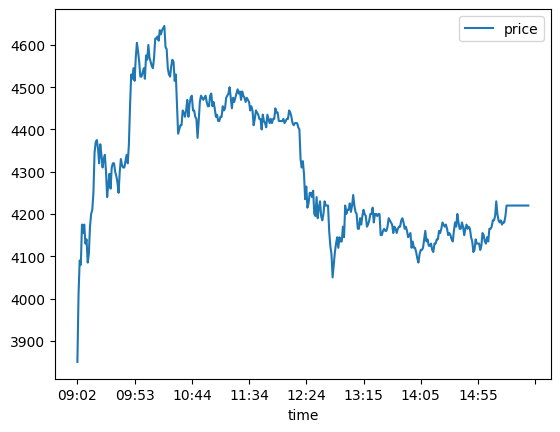

In [138]:
graph(all_pages1)

In [139]:
url = 'https://www.melon.com/chart/index.htm?dayTime=2023110315'
my_header =  {'user-agent':'Mozilla/5.0'}
html = requests.get(url, headers=my_header)

data = pd.read_html(html.text)[0]
this_time = datetime.today().strftime("%Y%m%d%H")

this_time[-2:] ## 시간만 빼온다



'18'

In [143]:
a = 0
idxlist = []
eta = pd.DataFrame()
while a <= int(this_time[-2:]):
    if a < 10:
        html = requests.get(f'https://www.melon.com/chart/index.htm?dayTime=202311030{a}', headers=my_header)
    else:
        html = requests.get(f'https://www.melon.com/chart/index.htm?dayTime=20231103{a}', headers=my_header)    
    data = pd.read_html(html.text)[0]
    eta = pd.concat([eta,data])
    eta = eta[eta['곡정보'] == 'ETA  NewJeans']
    idxlist.append(a)   
    a = a+1
eta_data = eta[['순위','곡정보']]
eta_data['시간'] = idxlist 
eta_data.set_index('시간',inplace=True)
eta_data.sort_index()



C:\Users\user\AppData\Local\Temp\ipykernel_9104\1589776387.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eta_data['시간'] = idxlist


,순위,곡정보
시간,,
0,23위,ETA NewJeans
1,10위,ETA NewJeans
2,10위,ETA NewJeans
3,10위,ETA NewJeans
4,10위,ETA NewJeans
5,10위,ETA NewJeans
6,10위,ETA NewJeans
7,10위,ETA NewJeans
8,15위,ETA NewJeans


In [ ]:
eta_data['순위'] = eta_data['순위'].str.replace('위','').astype(int)


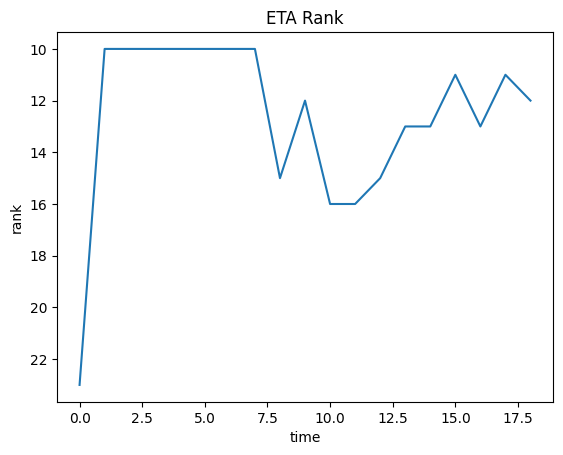

In [155]:
eta_data['순위'].plot.line(xlabel = 'time',ylabel = 'rank', title = 'ETA Rank')
plt.gca().invert_yaxis()
plt.show()